In [ ]:
#Import required packages 

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns


In [ ]:
#load dataset

In [ ]:
a_dataset = pd.read_csv("train_data.csv")

In [ ]:
#Print dataset information

In [ ]:
a_dataset['TypeOfAdmission'].unique()

# EDA
## Excluding columns
Look at the data below and the provided text file outlining the data value for each column
The first two columns ID, HealthServiceArea provide no real use in our dataframe. 
## Onehot encoding 
Looking at the various columns, there are various categorical values such as Gender, Race, TypeOfAdmission, CCSProcedureCode,APRSeverityOfIllnessCode, PaymentTypology and EmergencyDepartmentIndicator.

Looking at these columns further I believe that all are able to one hot encoded except APRSeverityOfIllness Code as these can be considered ordinal from 1 (Minor) to 4 (Extreme)

In [ ]:
print(a_dataset)

In [7]:
f, ax = plt.subplots(figsize=(11, 9))
corr = a_dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [8]:
a_dataset['PaymentTypology'].unique()

array(['Medicaid', 'Private Health Insurance', 'Blue Cross/Blue Shield',
       'Self-Pay', 'Managed Care, Unspecified', 'Miscellaneous/Other',
       'Federal/State/Local/VA', 'Medicare', 'Unknown'], dtype=object)

In [9]:
# Remove ID 

In [10]:
a_dataset = a_dataset.drop(columns = ['ID'])

In [11]:
a_dataset = a_dataset.drop(columns = ['HealthServiceArea'])

In [12]:
print(a_dataset)

      Gender                    Race TypeOfAdmission  CCSProcedureCode  \
0          F              Other Race         Newborn               228   
1          M  Black/African American         Newborn               228   
2          M              Other Race         Newborn               220   
3          F              Other Race         Newborn                 0   
4          F              Other Race         Newborn               228   
...      ...                     ...             ...               ...   
59961      M  Black/African American         Newborn               115   
59962      M                   White         Newborn               115   
59963      M                   White         Newborn               115   
59964      M                   White         Newborn                -1   
59965      F                   White         Newborn               231   

       APRSeverityOfIllnessCode           PaymentTypology  BirthWeight  \
0                             1      

In [13]:
# One-hot encoding, specifically Gender(M, F, U), Race(Black/African American, Multi, Other Race, Unkown, White, Other Race),  TypeOfAdmission(Elective, Emergency, Newborn, Not Available, Trauma, Urgent)
# APRSeverityOfIllnessCode(Minor (1), Moderate (2),   Major (3), Extreme (4)), 
#PaymentTypology('Medicaid', 'Blue Cross/Blue Shield', 'Private Health Insurance', 'Medicare', 'Managed Care, Unspecified', 'Self-Pay', 'Unknown', 'Federal/State/Local/VA', 'Miscellaneous/Other','Department of Corrections')
#EmergencyDepartmentIndicator(Y, N) 

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
OneHotEncoder_Gender = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_Gender.fit(a_dataset[['Gender']])

onehot_ = OneHotEncoder_Gender.transform(a_dataset[['Gender']]).toarray()

print(onehot_)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [16]:
print(onehot_.shape, OneHotEncoder_Gender.categories_)

(59966, 3) [array(['F', 'M', 'U'], dtype=object)]


In [17]:
# Begin One hot encoding for 'Gender'

In [18]:
colname = 'Gender'
for i in range(len(OneHotEncoder_Gender.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_Gender.categories_[0][i])] = onehot_[:,i]
    


In [19]:
a_dataset.shape

(59966, 17)

In [20]:
a_dataset = a_dataset.drop(columns = ['Gender'])

In [21]:
a_dataset.shape

(59966, 16)

In [22]:
a_dataset['TypeOfAdmission'].unique()

array(['Newborn', 'Emergency', 'Elective', 'Urgent'], dtype=object)

In [23]:
## Do every other categorical column

In [24]:
OneHotEncoder_TypeOfAdmission = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_TypeOfAdmission.fit(a_dataset[['TypeOfAdmission']])

onehot_ = OneHotEncoder_TypeOfAdmission.transform(a_dataset[['TypeOfAdmission']]).toarray()

colname = 'TypeOfAdmission'
for i in range(len(OneHotEncoder_TypeOfAdmission.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_TypeOfAdmission.categories_[0][i])] = onehot_[:,i]
    

In [25]:
print(onehot_.shape, OneHotEncoder_TypeOfAdmission.categories_)


(59966, 4) [array(['Elective', 'Emergency', 'Newborn', 'Urgent'], dtype=object)]


In [26]:
a_dataset = a_dataset.drop(columns = ['TypeOfAdmission'])

In [27]:
OneHotEncoder_Race = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_Race.fit(a_dataset[['Race']])

onehot_ = OneHotEncoder_Race.transform(a_dataset[['Race']]).toarray()

colname = 'Race'
for i in range(len(OneHotEncoder_Race.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_Race.categories_[0][i])] = onehot_[:,i]
    


In [28]:
a_dataset["CCSProcedureCode"].unique()

array([228, 220,   0, 231, 115,  -1, 216])

In [29]:
a_dataset = a_dataset.drop(columns = ['Race'])

In [30]:
OneHotEncoder_CCSProcedureCode = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_CCSProcedureCode.fit(a_dataset[['CCSProcedureCode']])

onehot_ = OneHotEncoder_CCSProcedureCode.transform(a_dataset[['CCSProcedureCode']]).toarray()

colname = 'CCSProcedureCode'
for i in range(len(OneHotEncoder_CCSProcedureCode.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_CCSProcedureCode.categories_[0][i])] = onehot_[:,i]

a_dataset = a_dataset.drop(columns = ['CCSProcedureCode'])

In [31]:
a_dataset

,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,...,Race_Multi-racial,Race_Other Race,Race_White,CCSProcedureCode_-1,CCSProcedureCode_0,CCSProcedureCode_115,CCSProcedureCode_216,CCSProcedureCode_220,CCSProcedureCode_228,CCSProcedureCode_231
0,1,Medicaid,3700,N,2611,9227,1751,8951,45,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,Medicaid,2900,N,3242,8966,3338,6409,34,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,Medicaid,2600,N,2611,9227,6000,14344,59,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59961,1,Blue Cross/Blue Shield,3600,N,1826,4190,1551,3715,36,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59962,2,Blue Cross/Blue Shield,3300,N,1826,4190,1551,3715,55,6,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59963,2,Blue Cross/Blue Shield,3400,N,1826,4190,1551,3715,55,4,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59964,2,Medicaid,3100,N,1826,4190,1551,3715,55,4,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
"""OneHotEncoder_EmergencyDepartmentIndicator = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_EmergencyDepartmentIndicator.fit(a_dataset[['EmergencyDepartmentIndicator']])

onehot_ = OneHotEncoder_EmergencyDepartmentIndicator.transform(a_dataset[['EmergencyDepartmentIndicator']]).toarray()

colname = 'EmergencyDepartmentIndicator'
for i in range(len(OneHotEncoder_EmergencyDepartmentIndicator.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_EmergencyDepartmentIndicator.categories_[0][i])] = onehot_[:,i]

a_dataset = a_dataset.drop(columns = ['EmergencyDepartmentIndicator'])"""

a_dataset.loc[a_dataset.EmergencyDepartmentIndicator == "N", "EmergencyDepartmentIndicator"] = 0
a_dataset.loc[a_dataset.EmergencyDepartmentIndicator == "Y", "EmergencyDepartmentIndicator"] = 1


In [33]:
OneHotEncoder_PaymentTypology = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_PaymentTypology.fit(a_dataset[['PaymentTypology']])

onehot_ = OneHotEncoder_PaymentTypology.transform(a_dataset[['PaymentTypology']]).toarray()

colname = 'PaymentTypology'
for i in range(len(OneHotEncoder_PaymentTypology.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_PaymentTypology.categories_[0][i])] = onehot_[:,i]

a_dataset = a_dataset.drop(columns = ['PaymentTypology'])

In [34]:
a_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   APRSeverityOfIllnessCode                   59966 non-null  int64  
 1   BirthWeight                                59966 non-null  int64  
 2   EmergencyDepartmentIndicator               59966 non-null  object 
 3   AverageCostInCounty                        59966 non-null  int64  
 4   AverageChargesInCounty                     59966 non-null  int64  
 5   AverageCostInFacility                      59966 non-null  int64  
 6   AverageChargesInFacility                   59966 non-null  int64  
 7   AverageIncomeInZipCode                     59966 non-null  int64  
 8   LengthOfStay                               59966 non-null  int64  
 9   Gender_F                                   59966 non-null  float64
 10  Gender_M              

## We will then proceed with Minmax scaling 

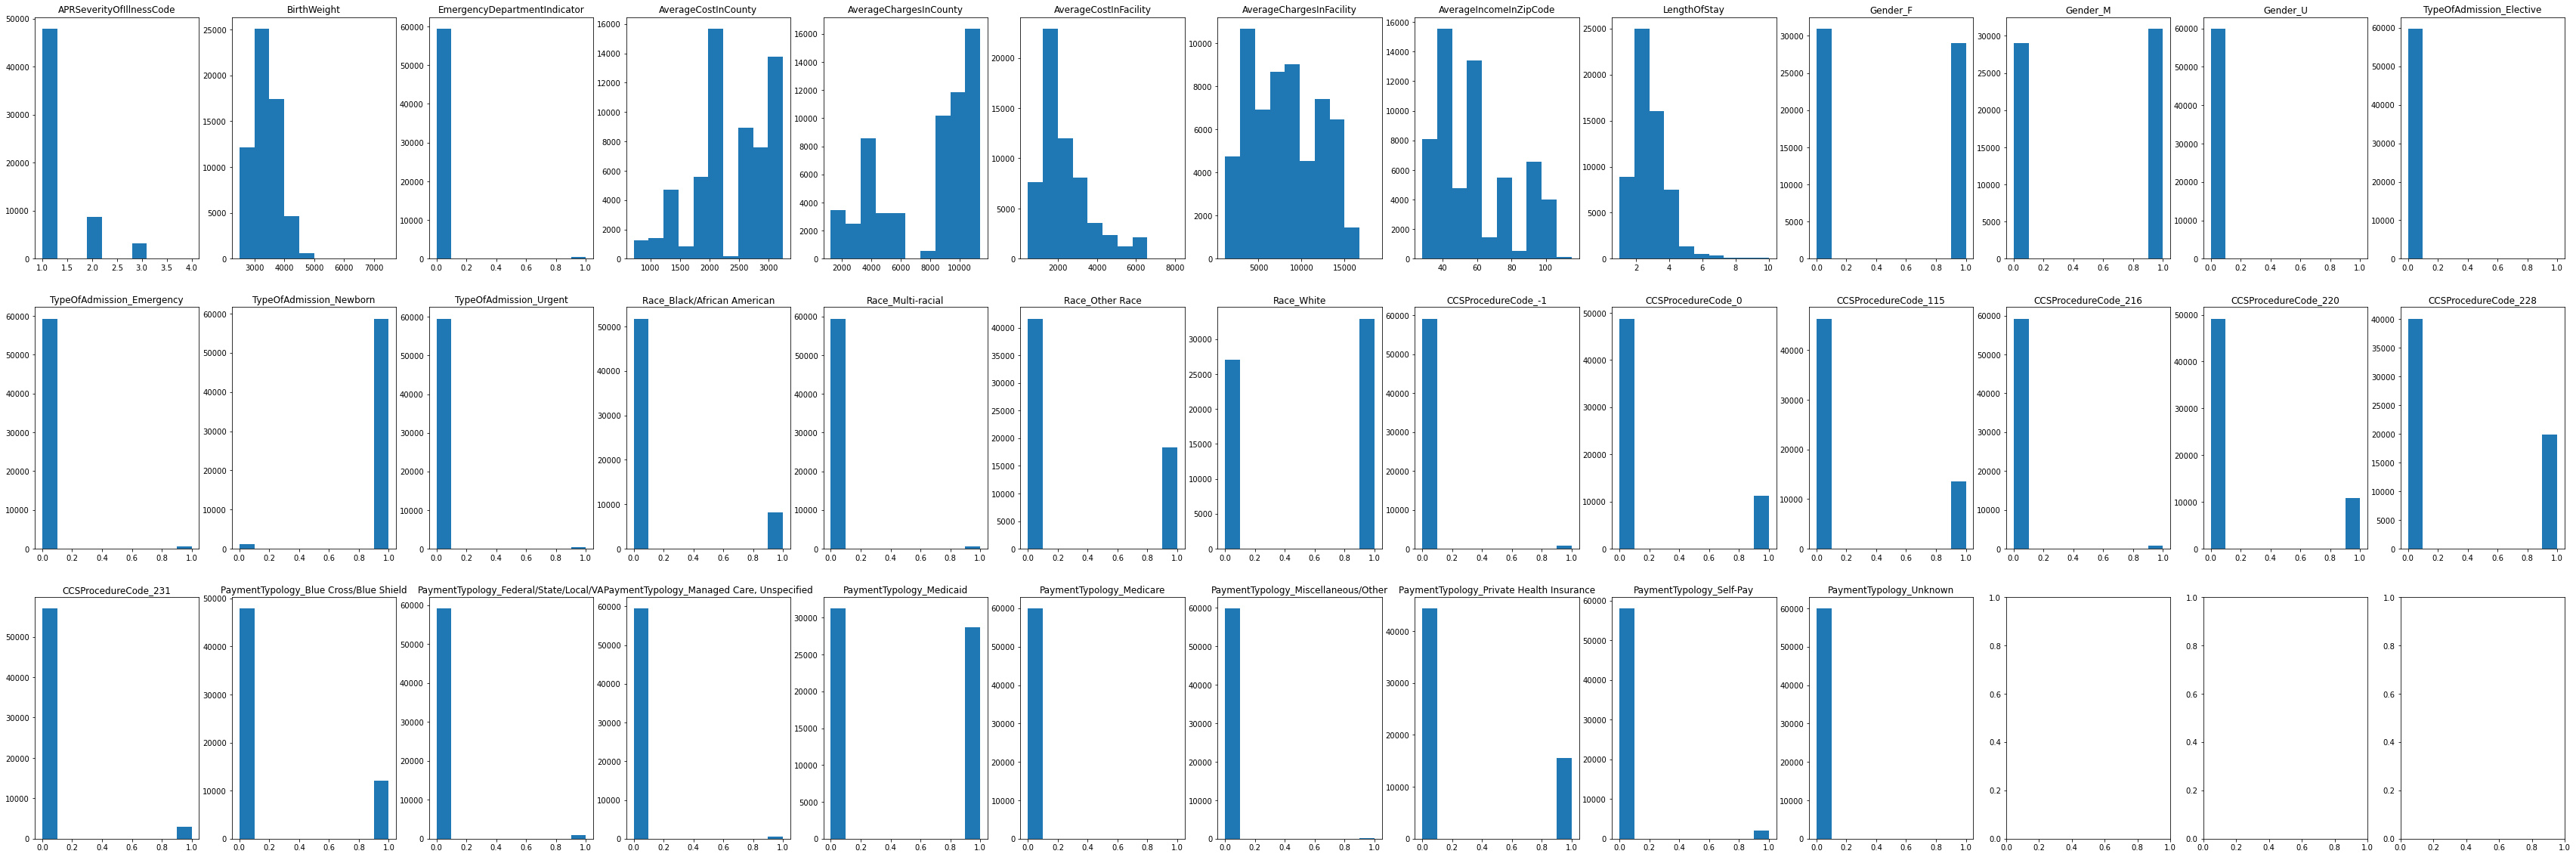

In [35]:
i = 0
j = 0
num_col = len(a_dataset.columns)

fig, axs = plt.subplots(3, 13,figsize=(60,20))
num_bins = 10


for col in a_dataset.columns:
    axs[j][i].hist(a_dataset[col], num_bins)
    axs[j][i].title.set_text(col)
       
    i +=1
    if i == 13:
        
        j += 1
        i = 0
    
plt.show()

<h3>We will now perform Feature scaling on the 7 non-categorical columns</h3>

Text(0.5, 1.0, 'After Standard Scaling')

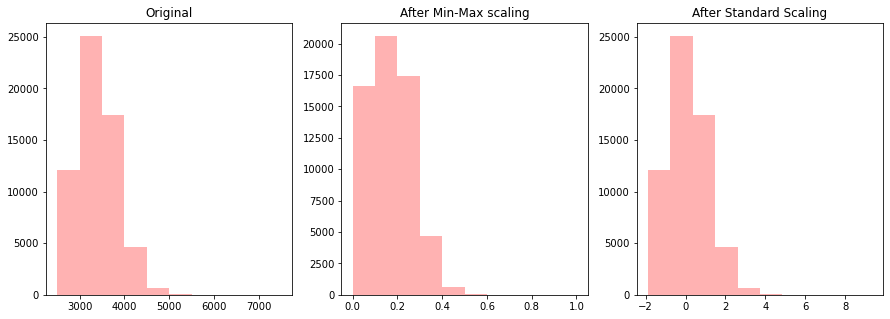

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

MinMaxScaler_RM = MinMaxScaler().fit(a_dataset[['BirthWeight']])
RM_minmax = MinMaxScaler_RM.transform(a_dataset[['BirthWeight']])

StandardScaler_RM = StandardScaler().fit(a_dataset[['BirthWeight']])
RM_standard = StandardScaler_RM.transform(a_dataset[['BirthWeight']])
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(a_dataset[['BirthWeight']], alpha=0.3, color='r')
plt.title("Original")

plt.subplot(1,3,2)
plt.hist(RM_minmax, alpha=0.3, color='r')
plt.title("After Min-Max scaling")

plt.subplot(1,3,3)
plt.hist(RM_standard, alpha=0.3, color='r')
plt.title("After Standard Scaling")



## As standard scaling is more similar to the original, we will use this transoformation
### We will first power transform the skewed data 

In [37]:
#a_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])
from sklearn.preprocessing import PowerTransformer



standscale_powerdtransformed_attributes = ['AverageCostInFacility','AverageChargesInCounty']
standScale_attributes = ['BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode']
non_encode_attributes = ['AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode']
a_dataset_scaled = a_dataset.copy()

standardscaler = StandardScaler().fit(a_dataset_scaled.loc[:, standScale_attributes])
a_dataset_scaled.loc[:, standScale_attributes] = standardscaler.transform(a_dataset_scaled.loc[:, standScale_attributes])


powertransformer = PowerTransformer(method='yeo-johnson', standardize=False).fit(a_dataset_scaled.loc[:, standscale_powerdtransformed_attributes])
a_dataset_scaled.loc[:, standscale_powerdtransformed_attributes] = powertransformer.transform(a_dataset_scaled.loc[:, standscale_powerdtransformed_attributes])                        

standardscalerr_pt = StandardScaler().fit(a_dataset_scaled.loc[:, standscale_powerdtransformed_attributes])
a_dataset_scaled.loc[:, standscale_powerdtransformed_attributes] = standardscalerr_pt.transform(a_dataset_scaled.loc[:, standscale_powerdtransformed_attributes])




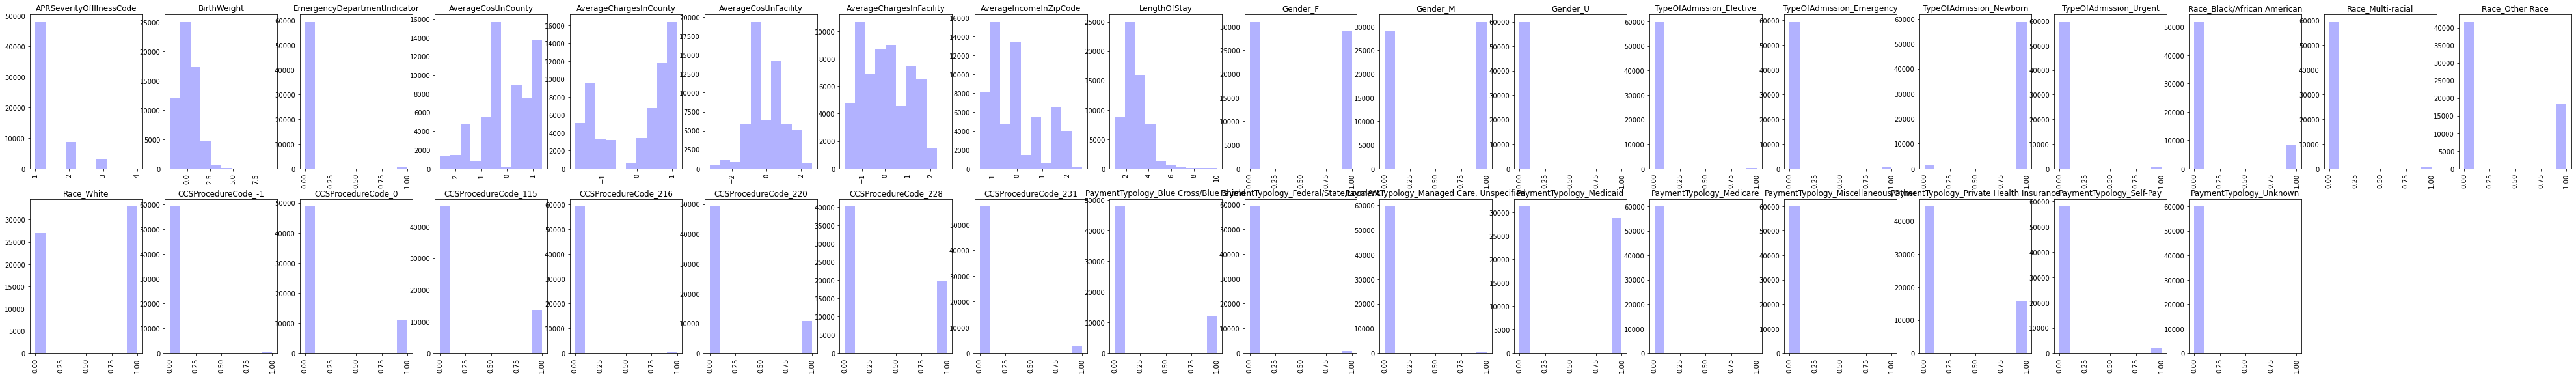

In [38]:
plt.figure(figsize=(70,20))
for i, col in enumerate(a_dataset_scaled.columns):
    plt.subplot(4,19,i+1)
    plt.hist(a_dataset_scaled[col], alpha=0.3, color='b', density=False)
    plt.title(col)
    plt.xticks(rotation='vertical')


In [39]:
"""a_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])
a_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])
a_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])
"""

"a_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])\na_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])\na_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])\n"

### Transform column "LengthOfStay" to 1 (if LengthOfStay < 4) or 0 if ( Length of stay >= 4)

In [40]:
a_dataset.loc[a_dataset.LengthOfStay < 4, "LengthOfStay"] = 1
a_dataset.loc[a_dataset.LengthOfStay > 3, "LengthOfStay"] = 0


In [41]:
a_dataset

,APRSeverityOfIllnessCode,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,...,CCSProcedureCode_231,PaymentTypology_Blue Cross/Blue Shield,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown
0,1,3700,0,2611,9227,1751,8951,45,1,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,2900,0,3242,8966,3338,6409,34,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,3200,0,3155,11381,4980,9323,45,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,3300,0,3155,11381,5826,15680,59,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,2600,0,2611,9227,6000,14344,59,1,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59961,1,3600,0,1826,4190,1551,3715,36,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59962,2,3300,0,1826,4190,1551,3715,55,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59963,2,3400,0,1826,4190,1551,3715,55,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59964,2,3100,0,1826,4190,1551,3715,55,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Start building Regression model
We will start by splitting training data into training and validation

In [42]:
print(a_dataset.shape[1])

36


In [43]:

from sklearn.model_selection import train_test_split

drop_indices = np.random.choice(a_dataset.index, 20000, replace=False)
a_subset = a_dataset.drop(drop_indices)

with pd.option_context('mode.chained_assignment', None):
    a_subset, val_data = train_test_split(a_subset, test_size= 0.25,
                                          shuffle = True, random_state =0)
    
print(a_subset.shape[0], val_data.shape[0])


29974 9992


In [44]:

print(a_subset.shape[0])

29974


In [45]:
len(a_dataset.columns)

36

In [88]:
non_encode_attributes = ['AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode']
train_x= a_subset[['LengthOfStay','AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode']].copy()
train_x_encoded = a_subset.drop(['LengthOfStay', 'AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode'], axis = 1).to_numpy()
train_y = a_subset[['LengthOfStay']].to_numpy()

val_x = val_data[['LengthOfStay','AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode']].copy()
val_y = val_data[['LengthOfStay']].to_numpy()

In [89]:
train_x

,LengthOfStay,AverageCostInFacility,AverageChargesInCounty,BirthWeight,AverageCostInCounty,AverageChargesInFacility,AverageIncomeInZipCode
26177,1,3032,11381,4400,3155,10135,104
24491,1,1710,5463,2900,1371,7077,45
27606,1,1555,3482,3700,2209,3570,55
39142,1,3032,11381,3500,3155,10135,74
15579,1,1459,4190,2700,1826,3505,36
...,...,...,...,...,...,...,...
31148,1,1686,4190,2500,1826,4243,36
48155,1,1927,10134,3000,2208,8584,104
45613,1,3911,10644,3700,2785,11059,77
31869,1,1052,11381,3600,3155,11314,115


In [90]:
from sklearn.metrics import f1_score

def get_f1_scores(clf, train_x, train_y, val_x, val_y):
    train_pred = clf.predict(train_x)
    val_pred = clf.predict(val_x)
    
    train_f1 = f1_score(train_y, train_pred, average='macro')
    val_f1 = f1_score(val_y, val_pred, average='macro')
    

In [91]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(2)
poly.fit(train_x)
train_x = poly.transform(train_x)
#test_X = poly.transform(test_X)
val_x = poly.transform(val_x)



In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x)

train_X = scaler.transform(train_x)
val_X = scaler.transform(val_x)
#test_X = scaler.transform(test_X)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [95]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, penalty='none', solver='saga', 
                         max_iter=1500, 
                         class_weight='balanced').fit(train_x, train_y.ravel())



train_pred = clf.predict(train_X)
val_pred = clf.predict(val_X)
    
train_f1 = f1_score(train_y, train_pred, average='macro')
val_f1 = f1_score(val_y, val_pred, average='macro')
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

Train F1-Score score: 0.732
Validation F1-Score score: 0.726


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
